Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.3.0
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 8, 1, 5, 5, 3, 6, 10, 11, 3, 7, …
$ Glucose                  <dbl> 89, 116, 115, 110, 99, 97, 117, 109, 88, 92, …
$ BloodPressure            <dbl> 66, 74, 0, 92, 84, 66, 92, 75, 58, 92, 78, 76…
$ SkinThickness            <dbl> 23, 0, 0, 0, 0, 15, 0, 26, 11, 0, 31, 0, 25, …
$ Insulin                  <dbl> 94, 0, 0, 0, 0, 140, 0, 0, 54, 0, 0, 0, 70, 0…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 35.4, 23.2, 34.1, 36.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 0.388, 0.487, 0.3…
$ Age                      <dbl> 21, 30, 29, 30, 50, 22, 38, 60, 22, 28, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

<span style="color: blue;"> `Outcome` variable is suitable as the "outcome" in a logistic regression model as it is a factor variable.</span>

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

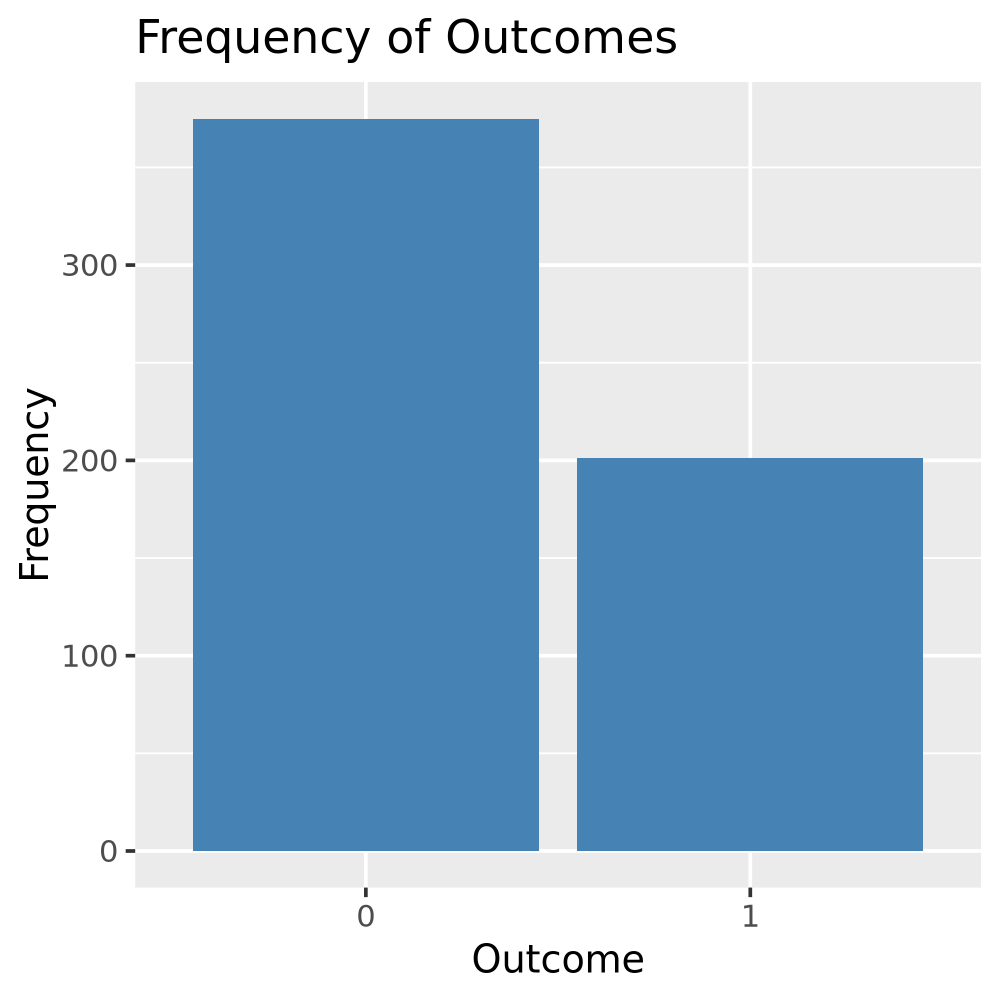

In [4]:
options(repr.plot.height = 4, repr.plot.width = 4)

ggplot(diabetes_train) +
    geom_bar(aes(x = Outcome), fill = 'steelblue') +
    labs(title = "Frequency of Outcomes", x = "Outcome", y = "Frequency")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

<span style="color: blue;"> The data is not balanced, there are less people tested positive for diabetes.</span>

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

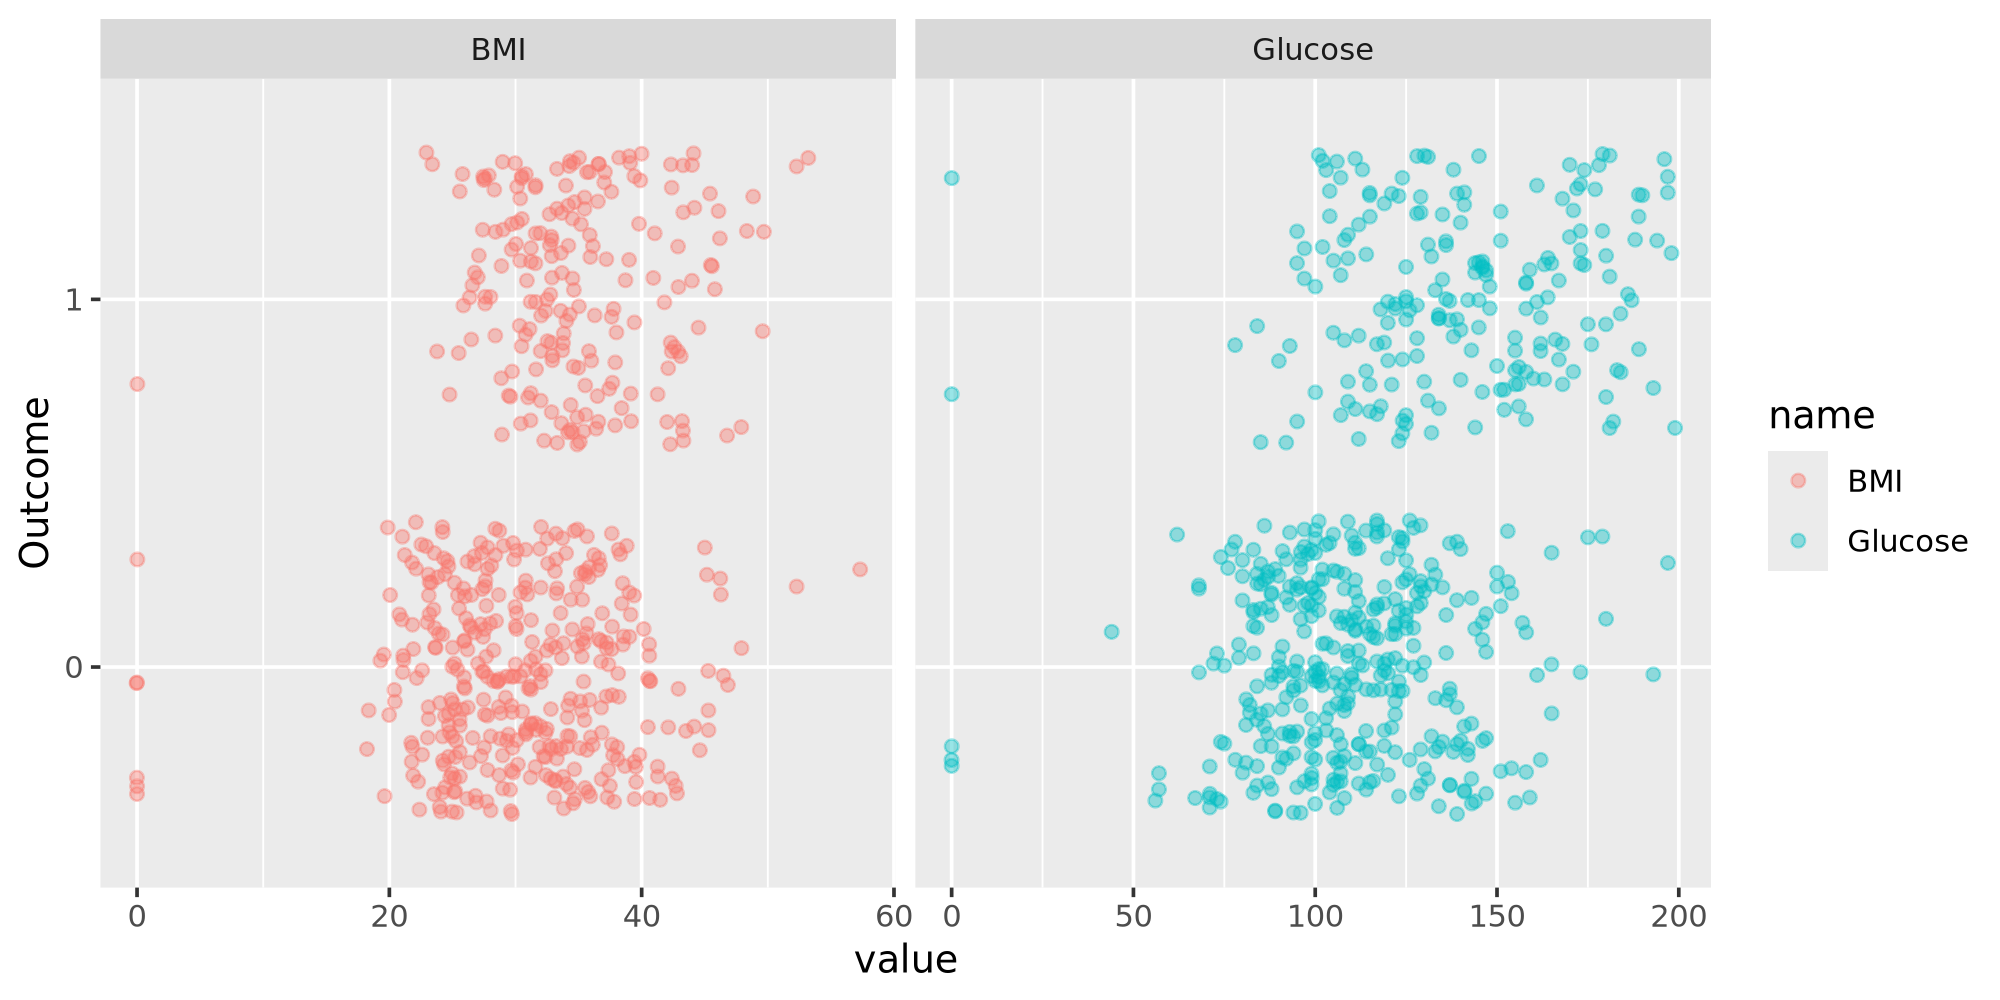

In [6]:
options(repr.plot.height = 4, repr.plot.width = 8)

ggplot(plot_df) +
    geom_jitter(aes(x = value, y = Outcome, color = name), alpha = 0.4) +
    facet_wrap(~ name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

<span style="color: blue;"> The `scales = 'free_x'` argument in `facet_wrap()` function allows the x-axis scales to vary across different facets (panels) while keeping the y-axis scale consistent. Therefore removing the `scales = 'free_x'` argument will make the x-axis scales the same across the 2 panels, which makes it hard to see patterns within individual panel.</span>

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [7]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.50306363,0.708155281,-10.595224,3.135903e-26
BMI,0.07383179,0.015817655,4.667682,3.046166e-06
Glucose,0.03600059,0.003965391,9.078700,1.098792e-19


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [8]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4241470,0.57585301,6,148,72,35,0,33.6,0.627,50,1
0,0.9226627,0.07733728,1,85,66,29,0,26.6,0.351,31,0
1,0.3088874,0.69111256,8,183,64,0,0,23.3,0.672,32,1
1,0.1369422,0.86305783,2,197,70,45,543,30.5,0.158,53,1
0,0.9527090,0.04729101,8,125,96,0,0,0.0,0.232,54,1
1,0.2057651,0.79423491,10,168,74,0,0,38.0,0.537,34,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [9]:
diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  23
         1  17  44

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- <span style="color: blue;"> There are 67 people had diabetes in the test data.
- <span style="color: blue;"> Of those that actually had diabetes, 44 were predicted to have diabetes by the logistic regression model.
- <span style="color: blue;"> 17 individuals predicted to have diabetes did not have diabetes.
